Mount Google Drive to Import Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import Basic python library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read The Datasets

In [3]:
variant_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Personalized Medicine Redefining Cancer Treatment/training_variants.csv')
print('Total Number of Datapoints: ', variant_df.shape[0])
print('Total Number of Features: ', variant_df.shape[1])
print('All Features Name: ', variant_df.columns.values)
variant_df.sample(5)

Total Number of Datapoints:  3321
Total Number of Features:  4
All Features Name:  ['ID' 'Gene' 'Variation' 'Class']


,ID,Gene,Variation,Class
3131,3131,KRAS,R164Q,6
1386,1386,FGFR1,K656E,7
1108,1108,FANCA,S858R,4
345,345,CDH1,D254N,4
2508,2508,BRCA1,D1344H,6


In [4]:
text_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Personalized Medicine Redefining Cancer Treatment/training_text.csv', sep='\|\|', engine='python', names=['ID', 'TEXT'], skiprows=1)
print('Total Number of Datapoints: ', text_df.shape[0])
print('Total Number of Features: ', text_df.shape[1])
print('All Features Name: ', text_df.columns.values)
text_df.sample(5)

Total Number of Datapoints:  3321
Total Number of Features:  2
All Features Name:  ['ID' 'TEXT']


,ID,TEXT
2912,2912,Abstract Sustained activation of the stress-...
3014,3014,"Context Some melanomas arising from acral, mu..."
385,385,Abstract Exposure to herbal remedies containi...
1007,1007,Tuberous sclerosis complex (TSC) is an autosom...
374,374,Critical determinants of DNA recognition by p5...


Cleanup Raw Text  

In [5]:
import re
from wordcloud import STOPWORDS, WordCloud

In [6]:
stop_words = set(STOPWORDS)

def clean_text(total_text, index, column):
  if type(total_text) is not int:
    text = ''

    # replace every special char with space
    total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)

    # replace multiple spaces with single space
    total_text = re.sub('\s+', ' ', total_text)

    # converting all the chars into lower-case.
    total_text = total_text.lower()

    # Combining all the above sentence

    from tqdm import tqdm
    # tqdm is for printing the status bar

    for word in tqdm(total_text.split()):
    # if the word is a not a stop word then retain that word from the data
      if not word in stop_words:
        text += word + ' '

    text_df[column][index] = text

    from nltk.stem import PorterStemmer
    porter = PorterStemmer()
    list_of_sentence=[]
    for  sentence in total_text:
        words_in_sentence=[]
        for words in sentence.split():
            words_in_sentence.append(porter.stem(words))

        list_of_sentence.append(' '.join(words_in_sentence))
    return(list_of_sentence)

Preprocess text

In [7]:
for index, row in text_df.iterrows():
  if type(row['TEXT']) is str:
    clean_text(row['TEXT'], index, 'TEXT')
  else:
    print('There is no text description for ID: ', index)

Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df[column][index] = text
100%|██████████| 16741/16741 [00:00<00:00, 1423554.86it/s]
<ipython-input-6-69a3375a3258>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df[column][index] = text
100%|██████████| 16102/16102 [00:00<00:00, 2363984.84it/s]
<ipython-input-6-69a3375a3258>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df[column][index] = text
100%|██████████| 6066/6066 [00:00<00:00, 1700143.54it/s]
<ipytho

There is no text description for ID:  1109


100%|██████████| 15609/15609 [00:00<00:00, 1149363.44it/s]
<ipython-input-6-69a3375a3258>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df[column][index] = text
100%|██████████| 10176/10176 [00:00<00:00, 997761.36it/s]
<ipython-input-6-69a3375a3258>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df[column][index] = text
100%|██████████| 5481/5481 [00:00<00:00, 942518.97it/s]
<ipython-input-6-69a3375a3258>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

There is no text description for ID:  1277


100%|██████████| 21096/21096 [00:00<00:00, 1187962.85it/s]
<ipython-input-6-69a3375a3258>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df[column][index] = text
100%|██████████| 28185/28185 [00:00<00:00, 1285828.04it/s]
<ipython-input-6-69a3375a3258>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df[column][index] = text
100%|██████████| 12999/12999 [00:00<00:00, 1255249.40it/s]
<ipython-input-6-69a3375a3258>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

There is no text description for ID:  1407


100%|██████████| 5664/5664 [00:00<00:00, 929187.54it/s]
<ipython-input-6-69a3375a3258>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df[column][index] = text
100%|██████████| 5664/5664 [00:00<00:00, 1637365.63it/s]
<ipython-input-6-69a3375a3258>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df[column][index] = text
100%|██████████| 3608/3608 [00:00<00:00, 1152467.35it/s]
<ipython-input-6-69a3375a3258>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

There is no text description for ID:  1639


Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df[column][index] = text
100%|██████████| 6923/6923 [00:00<00:00, 1134796.26it/s]
<ipython-input-6-69a3375a3258>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df[column][index] = text
100%|██████████| 13245/13245 [00:00<00:00, 1230013.43it/s]
<ipython-input-6-69a3375a3258>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df[column][index] = text
100%|██████████| 6923/6923 [00:00<00:00, 1138757.07it/s]
<ipython-

There is no text description for ID:  2755


100%|██████████| 7462/7462 [00:00<00:00, 1002623.54it/s]
<ipython-input-6-69a3375a3258>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df[column][index] = text
100%|██████████| 20861/20861 [00:00<00:00, 1169438.33it/s]
<ipython-input-6-69a3375a3258>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df[column][index] = text
100%|██████████| 24387/24387 [00:00<00:00, 1169108.73it/s]
<ipython-input-6-69a3375a3258>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

In [8]:
#merging both gene_variations and text data based on ID
df = pd.merge(variant_df, text_df, on='ID', how='left')
df.head()

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...


In [9]:
df[df.isnull().any(axis=1)]

,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,NaN
1277,1277,ARID5B,Truncating Mutations,1,NaN
1407,1407,FGFR3,K508M,6,NaN
1639,1639,FLT1,Amplification,6,NaN
2755,2755,BRAF,G596C,7,NaN


In [10]:
df.loc[df['TEXT'].isnull(), 'TEXT'] = df['Gene']+' '+df['Variation']

In [11]:
df[df['ID']==1407]

,ID,Gene,Variation,Class,TEXT
1407,1407,FGFR3,K508M,6,FGFR3 K508M


In [12]:
df.sample(5)

,ID,Gene,Variation,Class,TEXT
2697,2697,BRAF,T529M,5,selective inhibition protein tyrosine kinases ...
1593,1593,VHL,V84L,6,von hippel lindau tumor suppressor protein pvh...
2649,2649,BRCA1,V191D,5,missense substitutions uncertain clinical sign...
3148,3148,KRAS,P34R,7,contrast familiar role ras proliferation other...
766,766,ERBB2,N857S,2,overexpression erbb2 kinase observed one third...


In [13]:
df['Gene_Variation_TEXT'] = df['Gene']+' '+df['Variation']+' '+df['TEXT']

Define input and output/target features

In [14]:
y = df['Class']
X = df['Gene_Variation_TEXT']

In [15]:
X

0       FAM58A Truncating Mutations cyclin dependent k...
1       CBL W802* abstract background non small cell l...
2       CBL Q249E abstract background non small cell l...
3       CBL N454D recent evidence demonstrated acquire...
4       CBL L399V oncogenic mutations monomeric casita...
                              ...                        
3316    RUNX1 D171N introduction myelodysplastic syndr...
3317    RUNX1 A122* introduction myelodysplastic syndr...
3318    RUNX1 Fusions runt related transcription facto...
3319    RUNX1 R80C runx1 aml1 gene frequent target chr...
3320    RUNX1 K83E frequent mutations associated leuke...
Name: Gene_Variation_TEXT, Length: 3321, dtype: object

Split train and test data

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2656,), (665,), (2656,), (665,))

Apply Count Vectorizer to embed the words in n dimentional space of Vector

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000, ngram_range=(1,3))

Fit and Transform Count Vectorizer for Visualization

In [19]:
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

In [20]:
X_train.shape, X_test.shape

((2656, 10000), (665, 10000))

Evaluating KNeighbors
**********************************************
Train Result:
Accuracy Score: 68.86%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score     support
1              0.597194  0.656388  0.625393   454.00000
2              0.650155  0.589888  0.618557   356.00000
3              0.438596  0.357143  0.393701    70.00000
4              0.701954  0.787934  0.742463   547.00000
5              0.580110  0.546875  0.563003   192.00000
6              0.782609  0.626087  0.695652   230.00000
7              0.771242  0.777339  0.774278   759.00000
8              0.600000  0.333333  0.428571    18.00000
9              0.869565  0.666667  0.754717    30.00000
accuracy       0.688630  0.688630  0.688630     0.68863
macro avg      0.665714  0.593517  0.621815  2656.00000
weighted avg   0.689342  0.688630  0.686728  2656.00000
_______________________________________________
Confusion Matrix: 
[[298  15   2  86  29   8  1

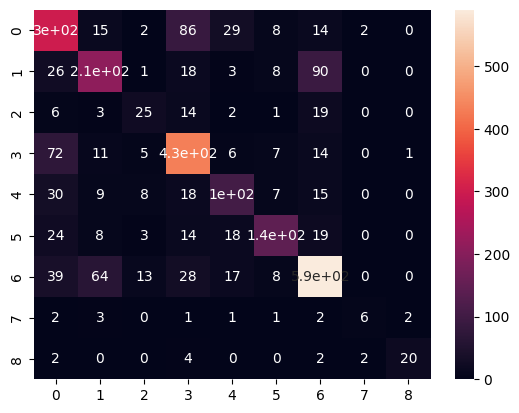

None
************************************************************************
Test Result:
Accuracy Score: 60.75%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score     support
1              0.515385  0.587719  0.549180  114.000000
2              0.554217  0.479167  0.513966   96.000000
3              0.888889  0.421053  0.571429   19.000000
4              0.600000  0.669065  0.632653  139.000000
5              0.346154  0.360000  0.352941   50.000000
6              0.697674  0.666667  0.681818   45.000000
7              0.732620  0.706186  0.719160  194.000000
8              0.000000  0.000000  0.000000    1.000000
9              1.000000  0.714286  0.833333    7.000000
accuracy       0.607519  0.607519  0.607519    0.607519
macro avg      0.592771  0.511571  0.539387  665.000000
weighted avg   0.616660  0.607519  0.608154  665.000000
_______________________________________________
Confusion Matrix: 
[[ 67   3   0  30   

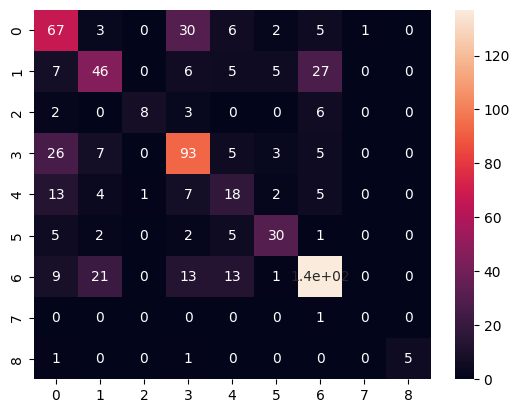

None
************************************************************************


Evaluating SupportVectorMachine
**********************************************
Train Result:
Accuracy Score: 70.41%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score      support
1              0.682573  0.724670  0.702991   454.000000
2              0.868421  0.463483  0.604396   356.000000
3              1.000000  0.014286  0.028169    70.000000
4              0.762324  0.791590  0.776682   547.000000
5              0.588235  0.260417  0.361011   192.000000
6              0.895105  0.556522  0.686327   230.000000
7              0.637619  0.973650  0.770594   759.000000
8              1.000000  0.222222  0.363636    18.000000
9              0.875000  0.700000  0.777778    30.000000
accuracy       0.704066  0.704066  0.704066     0.704066
macro avg      0.812142  0.522982  0.563509  2656.000000
weighted avg   0.735337  0.704066  0.678866  2656

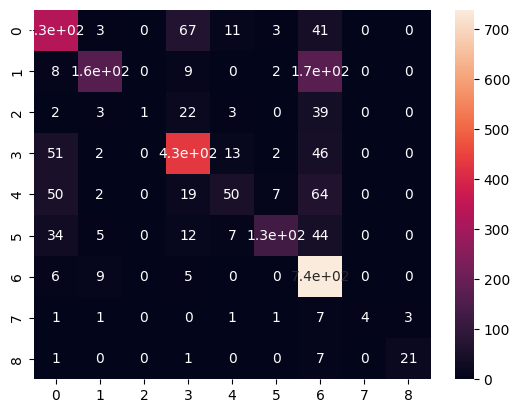

None
************************************************************************


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Result:
Accuracy Score: 61.50%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score     support
1              0.526316  0.614035  0.566802  114.000000
2              0.739130  0.354167  0.478873   96.000000
3              1.000000  0.105263  0.190476   19.000000
4              0.666667  0.604317  0.633962  139.000000
5              0.538462  0.140000  0.222222   50.000000
6              0.852941  0.644444  0.734177   45.000000
7              0.583062  0.922680  0.714571  194.000000
8              0.000000  0.000000  0.000000    1.000000
9              1.000000  0.571429  0.727273    7.000000
accuracy       0.615038  0.615038  0.615038    0.615038
macro avg      0.656286  0.439593  0.474262  665.000000
weighted avg   0.643673  0.615038  0.586758  665.000000
_______________________________________________
Confusion Matrix: 
[[ 70   1   0  23   2   0  18   0   0]
 [  2  34   0   0   0   2  58   0   0]
 [  2   0   2   4   

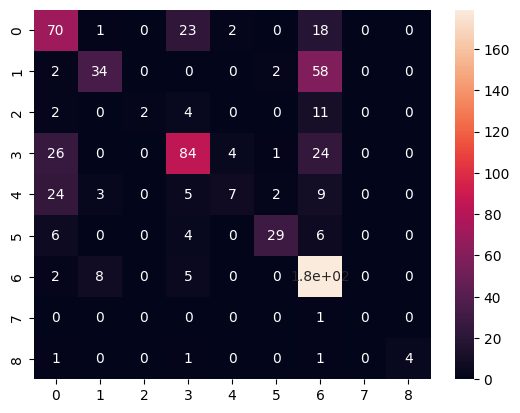

None
************************************************************************


Evaluating LogisticRegression
**********************************************
Train Result:
Accuracy Score: 85.13%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score     support
1              0.866197  0.812775  0.838636   454.00000
2              0.873656  0.912921  0.892857   356.00000
3              0.447552  0.914286  0.600939    70.00000
4              0.935743  0.851920  0.891866   547.00000
5              0.545126  0.786458  0.643923   192.00000
6              0.845833  0.882609  0.863830   230.00000
7              0.982972  0.836627  0.903915   759.00000
8              0.857143  1.000000  0.923077    18.00000
9              0.909091  1.000000  0.952381    30.00000
accuracy       0.851280  0.851280  0.851280     0.85128
macro avg      0.807035  0.888622  0.834603  2656.00000
weighted avg   0.879307  0.851280  0.859219  2656.00000
_______

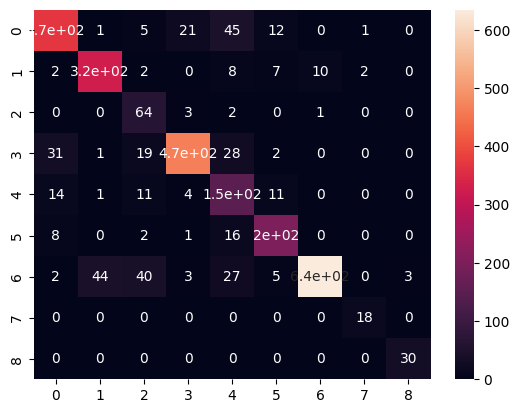

None
************************************************************************
Test Result:
Accuracy Score: 62.56%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score     support
1              0.588235  0.614035  0.600858  114.000000
2              0.556818  0.510417  0.532609   96.000000
3              0.464286  0.684211  0.553191   19.000000
4              0.705426  0.654676  0.679104  139.000000
5              0.359375  0.460000  0.403509   50.000000
6              0.704545  0.688889  0.696629   45.000000
7              0.718085  0.695876  0.706806  194.000000
8              0.000000  0.000000  0.000000    1.000000
9              1.000000  0.571429  0.727273    7.000000
accuracy       0.625564  0.625564  0.625564    0.625564
macro avg      0.566308  0.542170  0.544442  665.000000
weighted avg   0.636648  0.625564  0.628977  665.000000
_______________________________________________
Confusion Matrix: 
[[ 70   5   1  19   

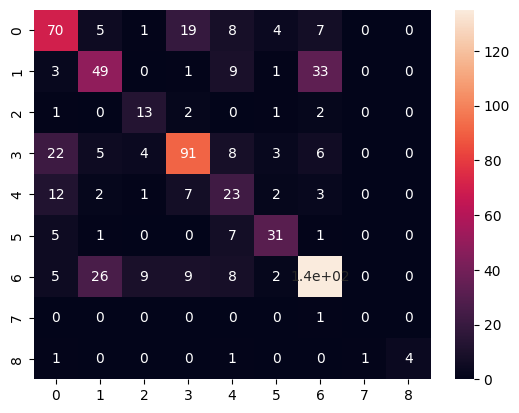

None
************************************************************************


Evaluating DecisionTree
**********************************************


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Result:
Accuracy Score: 54.52%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score      support
1              0.364791  0.885463  0.516710   454.000000
2              0.646018  0.205056  0.311301   356.000000
3              0.000000  0.000000  0.000000    70.000000
4              0.908213  0.343693  0.498674   547.000000
5              0.833333  0.208333  0.333333   192.000000
6              0.959016  0.508696  0.664773   230.000000
7              0.590226  0.827404  0.688974   759.000000
8              0.000000  0.000000  0.000000    18.000000
9              0.000000  0.000000  0.000000    30.000000
accuracy       0.545181  0.545181  0.545181     0.545181
macro avg      0.477955  0.330961  0.334863  2656.000000
weighted avg   0.647946  0.545181  0.511300  2656.000000
_______________________________________________
Confusion Matrix: 
[[402   2   0   5   3   3  39   0   0]
 [108  73   0   0   0   1 174   0   0]
 [ 21 

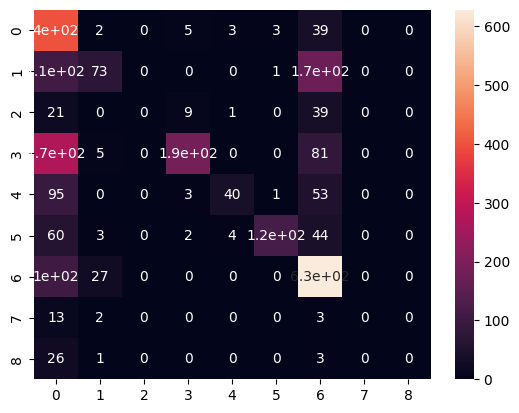

None
************************************************************************
Test Result:
Accuracy Score: 50.53%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score     support
1              0.336996  0.807018  0.475452  114.000000
2              0.461538  0.125000  0.196721   96.000000
3              0.000000  0.000000  0.000000   19.000000
4              0.711538  0.266187  0.387435  139.000000
5              1.000000  0.140000  0.245614   50.000000
6              0.852941  0.644444  0.734177   45.000000
7              0.582418  0.819588  0.680942  194.000000
8              0.000000  0.000000  0.000000    1.000000
9              0.000000  0.000000  0.000000    7.000000
accuracy       0.505263  0.505263  0.505263    0.505263
macro avg      0.438381  0.311360  0.302260  665.000000
weighted avg   0.575941  0.505263  0.457687  665.000000
_______________________________________________
Confusion Matrix: 
[[ 92   2   0   2   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


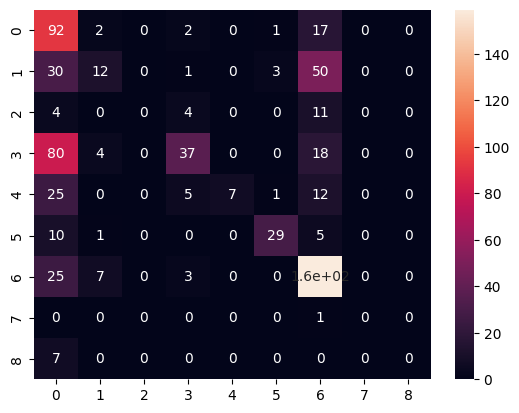

None
************************************************************************


Evaluating RandomForest
**********************************************
Train Result:
Accuracy Score: 81.51%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score      support
1              0.724820  0.887665  0.798020   454.000000
2              0.980695  0.713483  0.826016   356.000000
3              0.785714  0.157143  0.261905    70.000000
4              0.852174  0.895795  0.873440   547.000000
5              0.815217  0.390625  0.528169   192.000000
6              0.965116  0.721739  0.825871   230.000000
7              0.769710  0.977602  0.861288   759.000000
8              1.000000  0.166667  0.285714    18.000000
9              1.000000  0.700000  0.823529    30.000000
accuracy       0.815136  0.815136  0.815136     0.815136
macro avg      0.877050  0.623413  0.675995  2656.000000
weighted avg   0.832094  0.815136  0.800976  2656.000000


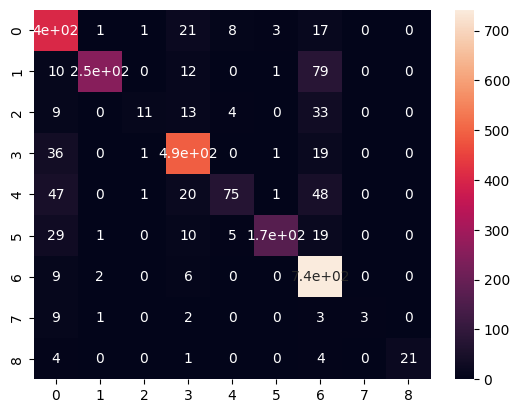

None
************************************************************************


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Result:
Accuracy Score: 66.47%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score     support
1              0.531646  0.736842  0.617647  114.000000
2              0.906977  0.406250  0.561151   96.000000
3              1.000000  0.105263  0.190476   19.000000
4              0.740157  0.676259  0.706767  139.000000
5              0.500000  0.180000  0.264706   50.000000
6              0.857143  0.666667  0.750000   45.000000
7              0.648746  0.932990  0.765328  194.000000
8              0.000000  0.000000  0.000000    1.000000
9              1.000000  0.428571  0.600000    7.000000
accuracy       0.664662  0.664662  0.664662    0.664662
macro avg      0.687185  0.459205  0.495119  665.000000
weighted avg   0.700733  0.664662  0.640302  665.000000
_______________________________________________
Confusion Matrix: 
[[ 84   0   0  12   3   1  14   0   0]
 [  6  39   0   3   4   2  42   0   0]
 [  1   0   2   3   

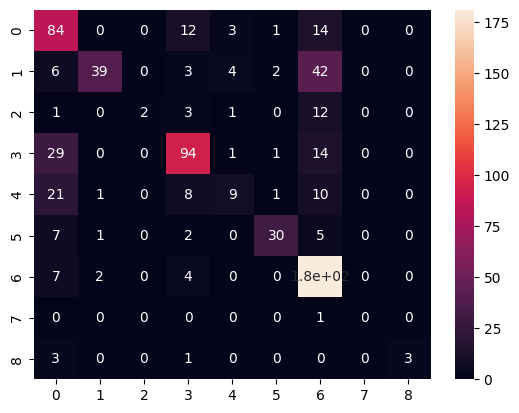

None
************************************************************************


Evaluating GradientBoostingClassifier
**********************************************
Train Result:
Accuracy Score: 84.83%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score      support
1              0.800000  0.819383  0.809576   454.000000
2              0.910979  0.862360  0.886003   356.000000
3              0.555556  0.142857  0.227273    70.000000
4              0.857143  0.910420  0.882979   547.000000
5              0.689024  0.588542  0.634831   192.000000
6              0.912442  0.860870  0.885906   230.000000
7              0.856454  0.935441  0.894207   759.000000
8              1.000000  0.944444  0.971429    18.000000
9              1.000000  0.933333  0.965517    30.000000
accuracy       0.848268  0.848268  0.848268     0.848268
macro avg      0.842400  0.777517  0.795302  2656.000000
weighted avg   0.841663  0.848268  0.840611

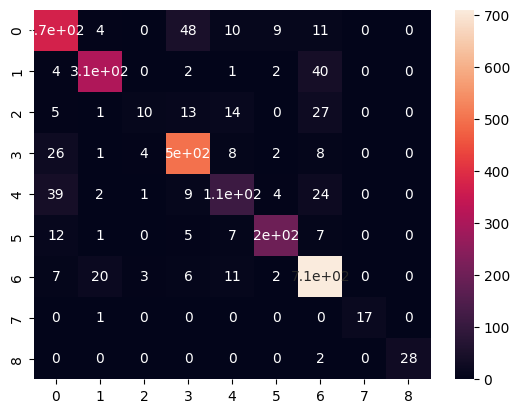

None
************************************************************************
Test Result:
Accuracy Score: 60.60%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score     support
1              0.532787  0.570175  0.550847  114.000000
2              0.565217  0.406250  0.472727   96.000000
3              0.333333  0.105263  0.160000   19.000000
4              0.686131  0.676259  0.681159  139.000000
5              0.324324  0.240000  0.275862   50.000000
6              0.680851  0.711111  0.695652   45.000000
7              0.640496  0.798969  0.711009  194.000000
8              0.000000  0.000000  0.000000    1.000000
9              0.800000  0.571429  0.666667    7.000000
accuracy       0.606015  0.606015  0.606015    0.606015
macro avg      0.507016  0.453273  0.468214  665.000000
weighted avg   0.591601  0.606015  0.591879  665.000000
_______________________________________________
Confusion Matrix: 
[[ 65   6   1  24   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Heatmap of Confusion Matrix: 
Axes(0.125,0.11;0.62x0.77)



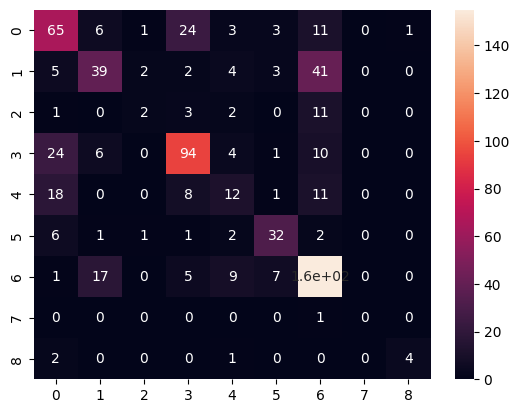

None
************************************************************************




In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True)).transpose()
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n{confusion_matrix(y_train, pred)}\n")
        print("_______________________________________________")
        print(f"Heatmap of Confusion Matrix: \n{sns.heatmap(confusion_matrix(y_train, pred), annot=True)}\n")
        print(plt.show())
        print('************************************************************************')

    else:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True)).transpose()
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n{confusion_matrix(y_test, pred)}\n")
        print("_______________________________________________")
        print(f"Heatmap of Confusion Matrix: \n{sns.heatmap(confusion_matrix(y_test, pred), annot=True)}\n")
        print(plt.show())
        print('************************************************************************')

# List of models to evaluate
models = [
    ("KNeighbors", KNeighborsClassifier()),
    ("SupportVectorMachine", SVC()),
    ("LogisticRegression", LogisticRegression(penalty='l2', C=10, class_weight='balanced', random_state=42, solver='lbfgs', n_jobs=-1)),
    ("DecisionTree", DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)),
    ("RandomForest", RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=10, random_state=0, max_features=None)),
    ("GradientBoostingClassifier", GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=5, random_state=0))
]

results = []

# Evaluate each model
for name, model in models:
    print(f"Evaluating {name}")
    print('**********************************************')
    model.fit(X_train, y_train)
    print_score(model, X_train, y_train, X_test, y_test, train=True)
    print_score(model, X_train, y_train, X_test, y_test, train=False)
    print("\n")